Goal: Create a model that predicts whether a transaction is fraudulent.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [10]:
np.random.seed(2)

In [11]:
dataset = pd.read_csv("creditcard.csv")

In [12]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


FEATURE SCALING

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
dataset["Normalized_Amount"]= StandardScaler().fit_transform(dataset["Amount"].values.reshape(-1,1))
dataset = dataset.drop(["Amount","Time"], axis=1)

In [15]:
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [16]:
X = dataset.drop(["Class"], axis=1)

In [17]:
y = dataset["Class"]

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3, random_state=0)

In [26]:
X_train.shape

(199364, 29)

In [27]:
X_test.shape

(85443, 29)

In [29]:
X_train= np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

FITTING DEEP LEARNING MODEL

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [23]:
model = Sequential([
    Dense(units=16, input_dim=29, activation="relu"),
    Dense(units=24, activation="relu"),
    Dropout(0.5),
    Dense(20, activation="relu"),
    Dense(24, activation="relu"),
    Dense(1, activation="sigmoid")
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_6 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(optimizer="Adam", loss="binary_crossentropy",metrics=["accuracy"])
model.fit(X_train,y_train,epochs=5,batch_size=15)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
199364/199364 [==============================] - 32s 162us/step - loss: 0.0100 - acc: 0.9979
Epoch 2/5
199364/199364 [==============================] - 30s 149us/step - loss: 0.0040 - acc: 0.9994
Epoch 3/5
199364/199364 [==============================] - 29s 147us/step - loss: 0.0035 - acc: 0.9993
Epoch 4/5
199364/199364 [==============================] - 29s 147us/step - loss: 0.0035 - acc: 0.9994
Epoch 5/5
199364/199364 [==============================] - 29s 148us/step - loss: 0.0032 - acc: 0.9993


EVALUATION OF MODEL

In [36]:
score = model.evaluate(X_test,y_test)

85443/85443 [==============================] - 3s 30us/step


In [37]:
print(score)

[0.004255678042340064, 0.999403110845827]


In [38]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())

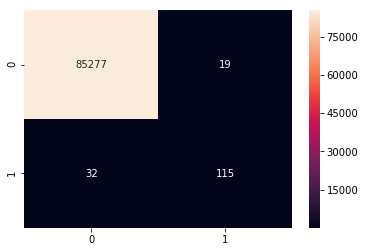

In [42]:
sns.heatmap(cm, fmt='g', annot=True)
plt.show()

Evaluation of model on whole dataset

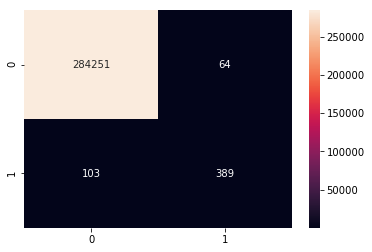

In [55]:
y_pred = model.predict(X)
type(y_pred)
sns.heatmap(confusion_matrix(y,y_pred.round()), fmt='g', annot=True)
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3, random_state=0)

FITTING RANDOM FOREST CLASSIFIER

In [57]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

C:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [59]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [60]:
y_pred = rfc.predict(X_test)

In [61]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.95      0.75      0.84       147

avg / total       1.00      1.00      1.00     85443



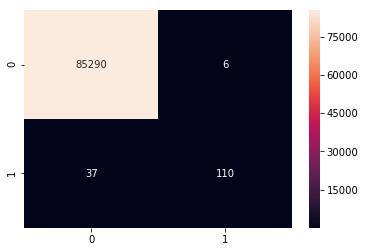

In [63]:
sns.heatmap(confusion_matrix(y_test,y_pred), fmt='g', annot=True)
plt.show()

In [65]:
rfc.score(X_test,y_test)

0.9994967405170698

In [66]:
y_pred = rfc.predict(X)

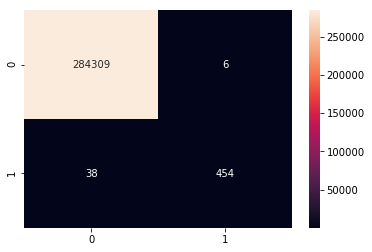

In [67]:
sns.heatmap(confusion_matrix(y,y_pred.round()), fmt='g', annot=True)
plt.show()

FITTING DECISION TREE CLASSIFIER

In [68]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3, random_state=0)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [71]:
y_pred = dtree.predict(X_test)

In [72]:
dtree.score(X_test,y_test)

0.9992860737567735

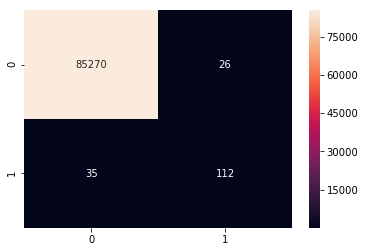

In [73]:
sns.heatmap(confusion_matrix(y_test,y_pred), fmt='g', annot=True)
plt.show()

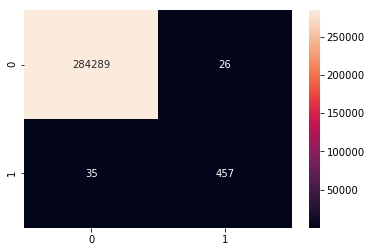

In [74]:
y_pred = dtree.predict(X)
sns.heatmap(confusion_matrix(y,y_pred.round()), fmt='g', annot=True)
plt.show()

UNDERSAMPLING DATASET

In [81]:
fraud_indices = dataset[dataset.Class == 1].index
no_fraud_indices = len(fraud_indices)

In [82]:
print(no_fraud_indices)

492


In [79]:
normal_indices = dataset[dataset.Class == 0].index

In [83]:
random_normal_indices = np.random.choice(normal_indices, no_fraud_indices, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [84]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
len(under_sample_indices)

984

In [114]:
under_sample_data = dataset.iloc[under_sample_indices,:]

In [115]:
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != "Class"]
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == "Class"]

In [116]:
X_train,X_test,y_train,y_test=train_test_split(X_undersample,y_undersample,test_size=0.3)

In [117]:
X_train= np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [118]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_6 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [119]:
model.compile(optimizer="Adam", loss="binary_crossentropy",metrics=["accuracy"])
model.fit(X_train,y_train,epochs=5,batch_size=15)

Epoch 1/5
688/688 [==============================] - 1s 2ms/step - loss: 0.2106 - acc: 0.9230
Epoch 2/5
688/688 [==============================] - 0s 180us/step - loss: 0.2059 - acc: 0.9215
Epoch 3/5
688/688 [==============================] - 0s 193us/step - loss: 0.1790 - acc: 0.9317
Epoch 4/5
688/688 [==============================] - 0s 195us/step - loss: 0.1577 - acc: 0.9375
Epoch 5/5
688/688 [==============================] - 0s 212us/step - loss: 0.1500 - acc: 0.9404


In [120]:
y_pred = model.predict(X_test)

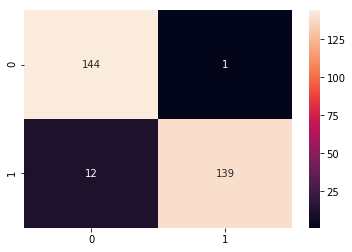

In [121]:
sns.heatmap(confusion_matrix(y_test,y_pred.round()), fmt='g', annot=True)
plt.show()

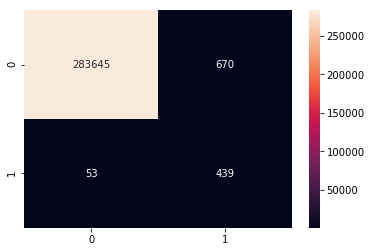

In [122]:
y_pred = model.predict(X)
sns.heatmap(confusion_matrix(y,y_pred.round()), fmt='g', annot=True)
plt.show()

OVERSAMPLING DATASET USING SMOTE

In [7]:
from imblearn.over_sampling import SMOTE

C:\Program Files (x86)\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Program Files (x86)\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Program Files (x86)\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Program Files (x86)\Anaconda3\lib\site-packa

In [28]:
X_resample, y_resample= SMOTE().fit_sample(X,y.values.ravel())

In [29]:
X_resample = pd.DataFrame(X_resample)
y_resample = pd.DataFrame(y_resample)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [31]:
X_train= np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [32]:
model.compile(optimizer="Adam", loss="binary_crossentropy",metrics=["accuracy"])
model.fit(X_train,y_train,epochs=5,batch_size=15)

Epoch 1/5
398041/398041 [==============================] - 64s 161us/step - loss: 0.0106 - acc: 0.9974
Epoch 2/5
398041/398041 [==============================] - 70s 176us/step - loss: 0.0096 - acc: 0.9977
Epoch 3/5
398041/398041 [==============================] - 74s 185us/step - loss: 0.0089 - acc: 0.9978
Epoch 4/5
398041/398041 [==============================] - 64s 160us/step - loss: 0.0083 - acc: 0.9981
Epoch 5/5
398041/398041 [==============================] - 61s 153us/step - loss: 0.0080 - acc: 0.9982


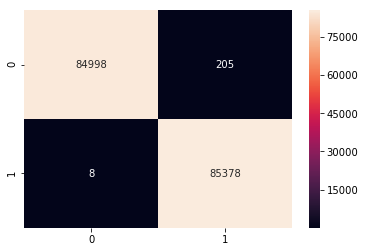

In [33]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred.round()), fmt='g', annot=True)
plt.show()

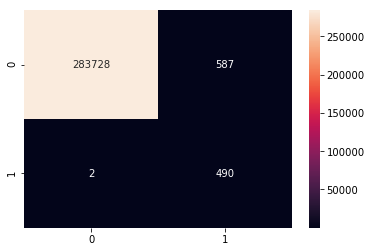

In [34]:
y_pred = model.predict(X)
sns.heatmap(confusion_matrix(y,y_pred.round()), fmt='g', annot=True)
plt.show()

Conclusion: We were able to reduce the false negatives to 2 by using oversampling technique(SMOTE), thus making model more accurate in tracking fraudulent transactions. 